In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
import os
from PIL import Image  # for loading images as YCbCr format
import matplotlib.pyplot as plt
from model import SRCNN
#import h5py

In [2]:
flags = tf.app.flags

flags.DEFINE_boolean("is_train", False, "[True] -> training, [False] -> testing")
FLAGS = flags.FLAGS

In [3]:
#시험삼아 해본 cell, training에 전혀 무관
#data = misc.imread("./Train/tt1.bmp")
#data_resized = misc.imresize(data, (33, 33))#자동으로 (33x33)사이즈의 blur 이미지가 됨
def make_batch(input_data, label_data, batch_size):
    index = np.arange(0, len(input_data))
    np.random.shuffle(index)
    index = index[:batch_size]
    shuffled_input_data = [input_data[i] for i in index]
    shuffled_label_data = [label_data[i] for i in index]
    
    return np.asarray(shuffled_input_data), np.asarray(shuffled_label_data)


C:\Users\JAEKYU\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\JAEKYU\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
C:\Users\JAEKYU\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
C:\Users\JAEKYU\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Data Loading Finish
Training or Testing Start
INFO:tensorflow:Restoring parameters from C:/Users/JAEKYU/Documents/Jupyter Notebook/Super_Resolution_/Weight/Weight.ckpt
weight 값 load 끝~
finish~!~


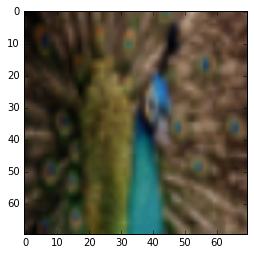

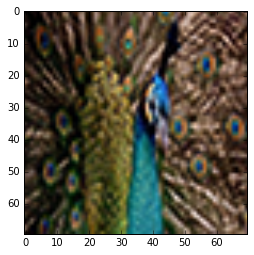

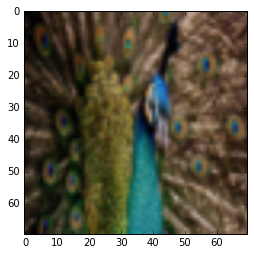

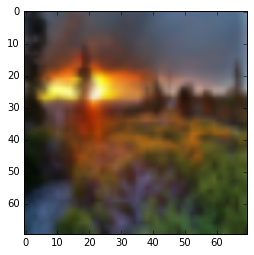

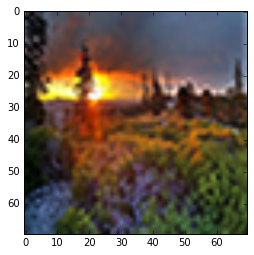

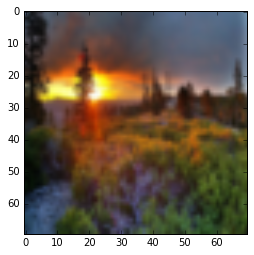

In [4]:
#Data Load--------------------------------------------------------------------------------------
img_data = [None]*3562
input_data = [None]*3562
tmp_data = [None]*3562
label_data = [None]*3562

for i in range(3562):
    #img_data[i] = misc.imread("./Train/t%d.bmp" %(i+1), mode = "YCbCr").astype(np.float)
    #img_data[i] dimention 33x33x3, img_data dimention 73x33x33x3
    
    img_data[i] = misc.imread("./Train_Data_reshape/t%d.bmp" %(i+1))
    tmp_data[i] = misc.imresize(img_data[i], (50, 50))
    input_data[i] = misc.imresize(tmp_data[i], (70, 70))#처음 망에 들어가는 이미지 (blur)
    label_data[i] = misc.imresize(img_data[i], (70, 70))#label 이미지 (선명)
print("Data Loading Finish")
#------------------------------------------------------------------------------------------------
#print(label_data[72])
#srcnn 객체 선언
print("Training or Testing Start")
with tf.Session() as sess:
    srcnn = SRCNN(sess = sess, input_data = input_data, label_data = label_data, label_size = 70, input_size = 70, input_img_channel=3)
    srcnn.training(FLAGS)
    print("finish~!~")
    plt.imshow(input_data[60])
    plt.show()
    srcnn.testing([label_data[60]])

    plt.imshow(label_data[60])
    plt.show()
    
    plt.imshow(input_data[6])
    plt.show()
    srcnn.testing([label_data[6]])

    plt.imshow(label_data[6])
    plt.show()
    
    #plt.imshow(sess.run(srcnn.W1))